#  EDA - 1 Bike Details Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('BIKE DETAILS.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


In [ ]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [ ]:
df.shape

(1061, 7)

In [ ]:
df.dtypes

,0
name,object
selling_price,int64
year,int64
seller_type,object
owner,object
km_driven,int64
ex_showroom_price,float64


In [ ]:
df.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [ ]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [ ]:
df.seller_type.unique()

array(['Individual', 'Dealer'], dtype=object)

Q1. What is the range of selling prices in the dataset ?

In [ ]:
price_range = (df['selling_price'].max() - df['selling_price'].min())
price_range

755000

Q2. What is the median selling price for bikes in the dataset ?

In [ ]:
median_price = df['selling_price'].median()
median_price

45000.0

Q3. What is the most common seller type?

In [ ]:
seller_type_counts = df['seller_type'].mode()[0]
seller_type_counts

'Individual'

Q4 How many bikes have driven more than 50,000 kilometers ?

In [ ]:
bikes_over_50k = df[df['km_driven'] > 50000]
bikes_over_50k.shape[0]

170

Q5. What is the average km_driven value for each ownership type?

In [ ]:
average_km_driven = df.groupby('owner')['km_driven'].mean()
average_km_driven

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


Q6. What proportion of bikes are from the year 2015 or older?

In [ ]:
df_filtered = df[df['year'] >= 2015]['name'].count()
df_filtered

560

Q7. What is the trend of missing values across the dataset?

In [ ]:
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


Q8. What is the highest ex_showroom_price recorded, and for which bike ?

In [ ]:
highest_priced_bikes = df[df["ex_showroom_price"] == max_price][["name", "ex_showroom_price"]]
highest_priced_bikes

,name,ex_showroom_price
134,Harley-Davidson Street Bob,1278000.0


Q9. What is the total number of bikes listed by each seller type?

In [ ]:
df.groupby('seller_type')['name'].count()

,name
seller_type,
Dealer,6
Individual,1055


Q10. What is the relationship between selling_price and km_driven for first-owner bikes?

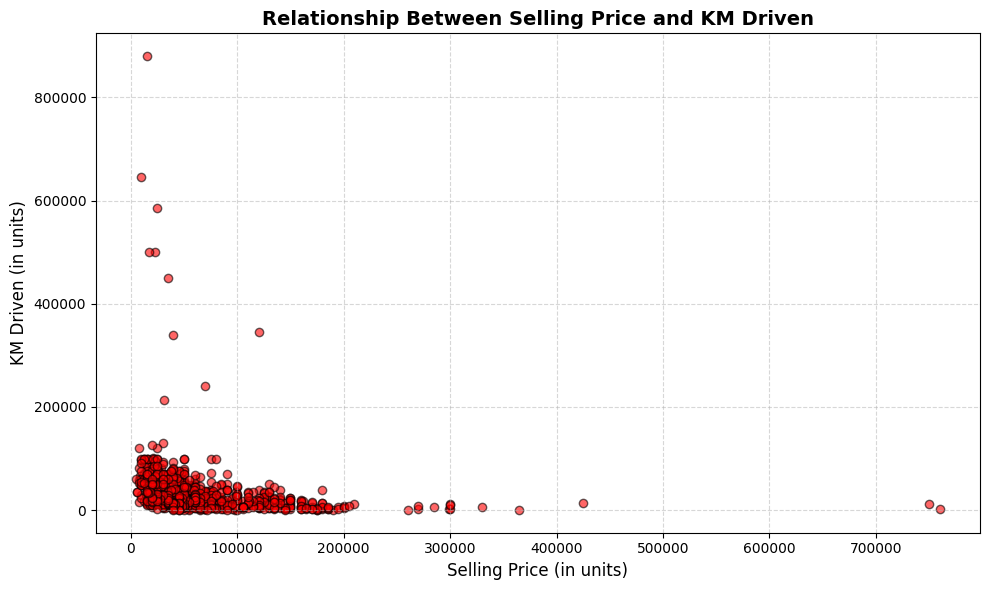

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df.selling_price, df.km_driven, color='red', alpha=0.6, edgecolors='black')
plt.title("Relationship Between Selling Price and KM Driven", fontsize=14, fontweight='bold')
plt.xlabel("Selling Price (in units)", fontsize=12)
plt.ylabel("KM Driven (in units)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Q11. Identify and remove outliers in the km_driven column using the IQR method.

In [ ]:
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Identify_outliers = df[(df['km_driven'] < lower_bound) | (df['km_driven'] > upper_bound)].shape[0]

Remove_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)].shape[0]


In [ ]:
Identify_outliers

39

In [ ]:
Remove_outliers

1022

Q12. Perform a bivariate analysis to visualize the relationship between year and selling_price.

<Axes: xlabel='year', ylabel='selling_price'>

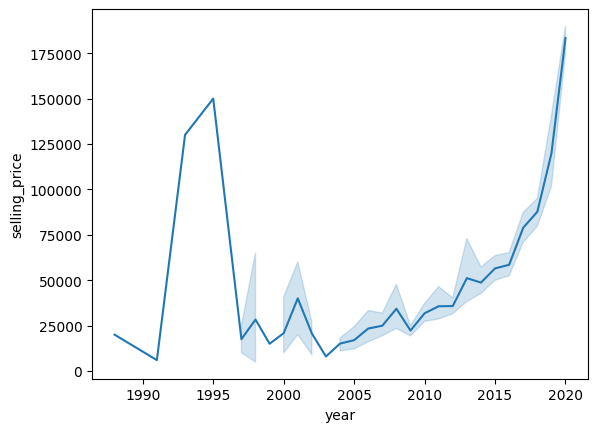

In [ ]:
sns.lineplot(x='year', y='selling_price', data=df)

Q13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year) ?

<Axes: xlabel='bike_age', ylabel='selling_price'>

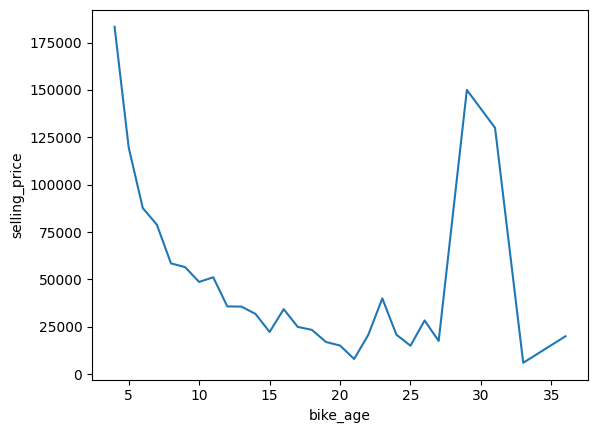

In [ ]:
df["bike_age"] = 2024 - df["year"]

bike_age = df.groupby("bike_age")["selling_price"].mean().reset_index()
sns.lineplot(x = "bike_age",y = "selling_price" ,data = bike_age)

Q14. Which bike names are priced significantly above the average price for their manufacturing year?

In [ ]:
 #Step 1: Calculate the average price per manufacturing year
average_price_per_year = df.groupby('year')['selling_price'].mean().reset_index()
average_price_per_year.rename(columns={'selling_price': 'avg_price'}, inplace=True)

# Step 2: Merge the average price with the original dataset
df = df.merge(average_price_per_year, on='year', how='left')

# Step 3: Identify bikes priced significantly above the average (e.g., 20%)
threshold = 1.2  # Change this value to modify the significance threshold
df['is_above_avg'] = df['selling_price'] > threshold * df['avg_price']

# Step 4: Filter bikes priced significantly above average
significant_bikes = df[df['is_above_avg']][['name', 'year', 'selling_price', 'avg_price']]

# Step 5: Display the results
print(significant_bikes)

                                      name  year  selling_price      avg_price
0                Royal Enfield Classic 350  2019         175000  119689.511628
2      Royal Enfield Classic Gunmetal Grey  2018         150000   87660.374046
7     Royal Enfield Bullet 350 [2007-2011]  2008         180000   34289.285714
13                           Yamaha YZF R3  2019         365000  119689.511628
17                        Yamaha YZF R15 S  2010          40000   31793.333333
...                                    ...   ...            ...            ...
984              Royal Enfield Classic 500  2014          95000   48668.131868
985              Royal Enfield Classic 500  2011          90000   35655.721311
1005                    TVS Apache RTR 160  2014          60000   48668.131868
1008                    Bajaj Pulsar 220 F  2012          52000   35748.400000
1023                Bajaj Avenger 220 dtsi  2012          45000   35748.400000

[233 rows x 4 columns]


Q15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

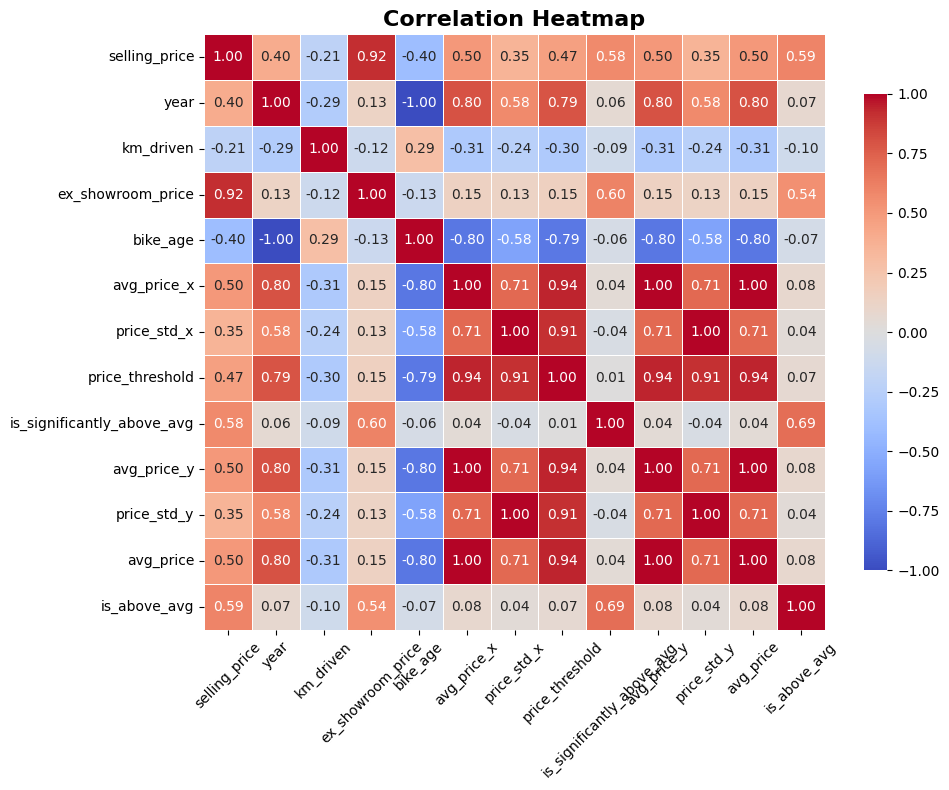

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    df.corr(numeric_only=True),  # Correlation matrix for numeric columns
    annot=True,                 # Show correlation values
    fmt=".2f",                  # Format values to 2 decimal places
    cmap="coolwarm",            # Colormap for heatmap
    linewidths=0.5,             # Add space between cells
    cbar_kws={"shrink": 0.8},   # Shrink color bar
)

plt.title("Correlation Heatmap", fontsize=16, fontweight="bold")
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels for better visibility
plt.yticks(fontsize=10)
plt.tight_layout()  # Ensure layout fits within the figure
plt.show()

# EDA - 2 Car Sale Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('Car Sale.csv')

In [ ]:
df.shape

(23906, 16)

In [ ]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [ ]:
df.dtypes

,0
Car_id,object
Date,object
Customer Name,object
Gender,object
Annual Income,int64
Dealer_Name,object
Company,object
Model,object
Engine,object
Transmission,object


In [ ]:
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [ ]:
df.sample(2)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
11660,C_CND_011661,3/5/2023,Amira,Male,480000,Buddy Storbeck's Diesel Service Inc,Saturn,LS,Overhead Camshaft,Manual,Pale White,14000,06457-3834,Sedan,8180849,Middletown
6785,C_CND_006786,10/9/2022,Aissatou,Male,400000,Nebo Chevrolet,Saturn,LS,DoubleÂ Overhead Camshaft,Auto,Pale White,45000,06457-3834,Sedan,7468654,Middletown


In [ ]:
df.isnull().sum()

,0
Car_id,0
Date,0
Customer Name,1
Gender,0
Annual Income,0
Dealer_Name,0
Company,0
Model,0
Engine,0
Transmission,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.rename(columns = {"Price ($)":"Price"},inplace = True)

Q1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?

In [ ]:
avg_selling_price = df.groupby("Dealer_Name")["Price"].mean().reset_index()
avg_selling_price.rename(columns = {"Price":"Avg_price"},inplace = True)
avg_selling_price

,Dealer_Name,Avg_price
0,Buddy Storbeck's Diesel Service Inc,27217.261563
1,C & M Motors Inc,28111.755200
2,Capitol KIA,28189.703822
3,Chrysler Plymouth,27555.526400
4,Chrysler of Tri-Cities,28123.091054
5,Classic Chevy,28602.014446
6,Clay Johnson Auto Sales,27816.027113
7,Diehl Motor CO Inc,27993.929487
8,Enterprise Rent A Car,28312.580800
9,Gartner Buick Hyundai Saab,28247.621019


In [ ]:
sorted_avg_selling_price = avg_selling_price.sort_values(by = "Avg_price", ascending = False)
sorted_avg_selling_price

,Dealer_Name,Avg_price
27,U-Haul CO,28769.919006
5,Classic Chevy,28602.014446
19,Rabun Used Car Sales,28527.536177
11,Iceberg Rentals,28522.958533
8,Enterprise Rent A Car,28312.580800
23,Scrivener Performance Engineering,28297.371589
9,Gartner Buick Hyundai Saab,28247.621019
22,Saab-Belle Dodge,28190.139888
2,Capitol KIA,28189.703822
20,Race Car Help,28163.372706


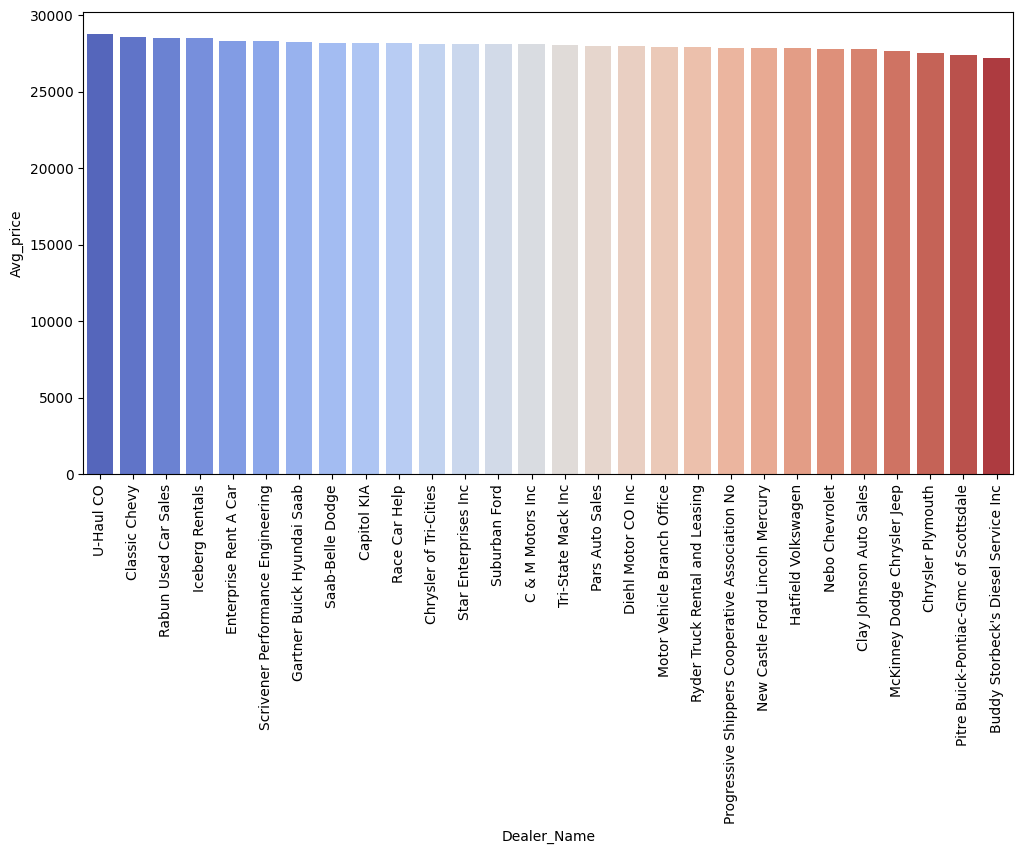

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(x = sorted_avg_selling_price.Dealer_Name,y = sorted_avg_selling_price.Avg_price,palette = "coolwarm")
plt.xticks(rotation = 90)
plt.show()

Q2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends ?

In [ ]:
price_variation_by_brand = df.groupby('Company')['Price'].std().reset_index()
price_variation_by_brand.columns = ['Company', 'Price_Std']
price_variation_by_brand

,Company,Price_Std
0,Acura,8183.046414
1,Audi,12904.243867
2,BMW,15065.578723
3,Buick,17142.232626
4,Cadillac,19517.120220
5,Chevrolet,13311.063223
6,Chrysler,11583.286811
7,Dodge,11187.592085
8,Ford,15849.090227
9,Honda,11148.629062


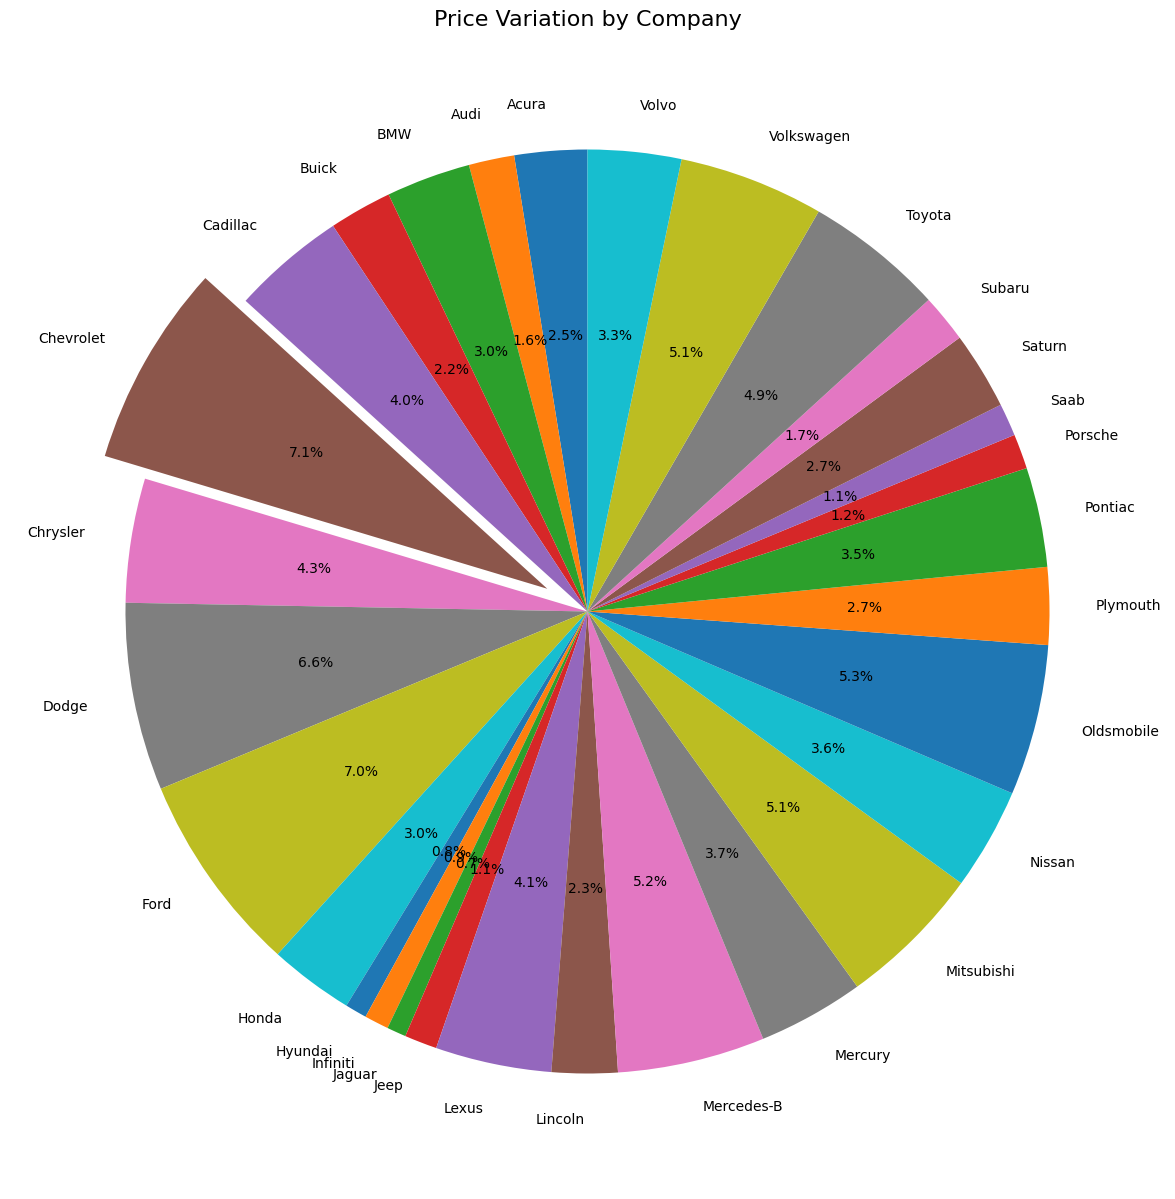

In [ ]:
plt.figure(figsize=(15, 15))  # Set the figure size (width=12, height=8 in inches)
plt.pie(
    x=price_variation['sum_of_price'],  # Numerical values for the pie chart
    labels=price_variation['Company'],  # Labels for the slices
    autopct='%1.1f%%',  # Display percentages on slices
    startangle=90,  # Start the pie chart at 90 degrees
    explode=[0.1 if i == max(price_variation['sum_of_price']) else 0 for i in price_variation['sum_of_price']]  # Optional: Explode the largest slice
)
plt.title('Price Variation by Company', fontsize=16)  # Add a larger title
plt.show()

Q3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare ?

In [ ]:
stats = df.groupby("Transmission")["Price"].describe(percentiles=[0.25, 0.5, 0.75])

# Calculate IQR for each transmission type
stats["IQR"] = stats["75%"] - stats["25%"]
stats

,count,mean,std,min,25%,50%,75%,max,IQR
Transmission,,,,,,,,,
Auto,12571.0,28248.525972,13747.070597,1200.0,19000.0,24000.0,35500.0,75700.0,16500.0
Manual,11335.0,27914.710631,15862.871978,1700.0,17000.0,22001.0,34000.0,85800.0,17000.0


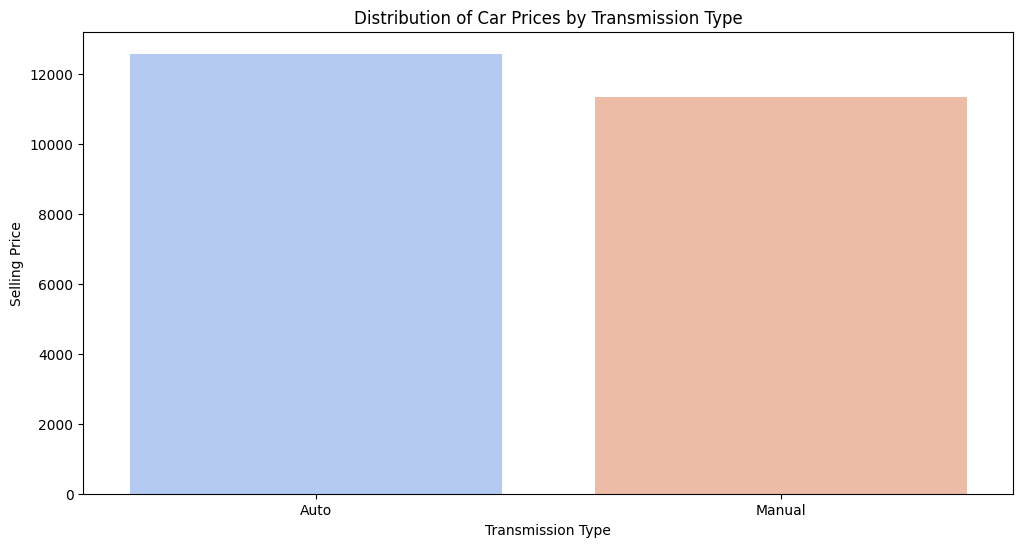

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df['Transmission'], palette="coolwarm")
plt.title("Distribution of Car Prices by Transmission Type")
plt.xlabel("Transmission Type")
plt.ylabel("Selling Price")
plt.show()

Q4. What is the distribution of car prices across different regions ?

In [ ]:
data = df.groupby("Dealer_Region")["Price"].sum().reset_index()
data

,Dealer_Region,Price
0,Aurora,88687382
1,Austin,117192531
2,Greenville,88149602
3,Janesville,106351234
4,Middletown,87134628
5,Pasco,88040714
6,Scottsdale,95969374


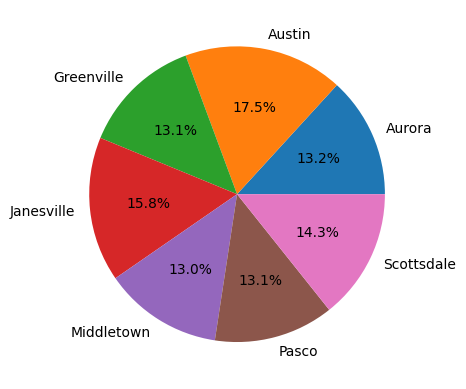

In [ ]:
plt.pie(x = data.Price,labels = data.Dealer_Region, autopct = "%1.1f%%")
plt.show()

Q5. What is the distribution of cars based on body styles?

In [ ]:
df.groupby("Body Style")["Car_id"].count()

,Car_id
Body Style,
Hardtop,2971
Hatchback,6128
Passenger,3945
SUV,6374
Sedan,4488


Q6. How does the average selling price of cars vary by customer gender and annual income ?

In [ ]:
data = df.groupby(["Gender","Annual Income"])["Price"].mean().reset_index()
data

,Gender,Annual Income,Price
0,Female,13500,28132.038732
1,Female,106000,46001.000000
2,Female,121000,20000.000000
3,Female,190000,19001.000000
4,Female,211000,51000.000000
...,...,...,...
3437,Male,6600000,39000.000000
3438,Male,6800000,15000.000000
3439,Male,7650000,21000.000000
3440,Male,8000000,85000.000000


<Axes: xlabel='Price', ylabel='Annual Income'>

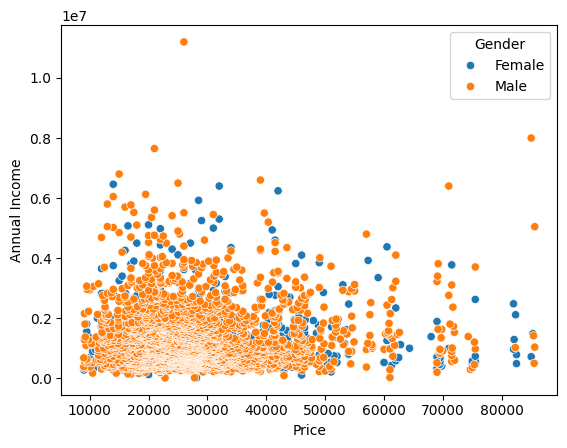

In [ ]:
sns.scatterplot(x = data.Price, y = data["Annual Income"],hue = data.Gender )

Q7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?

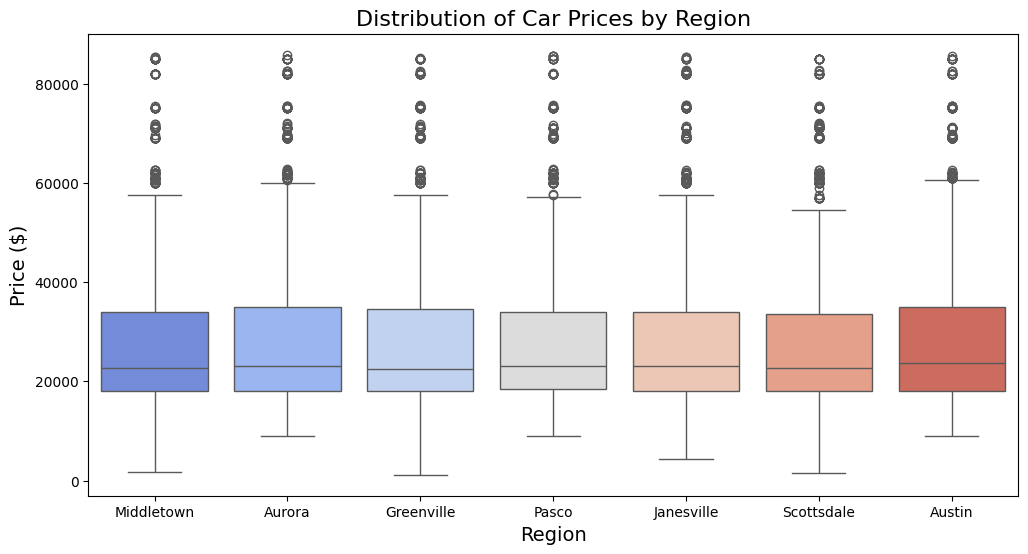

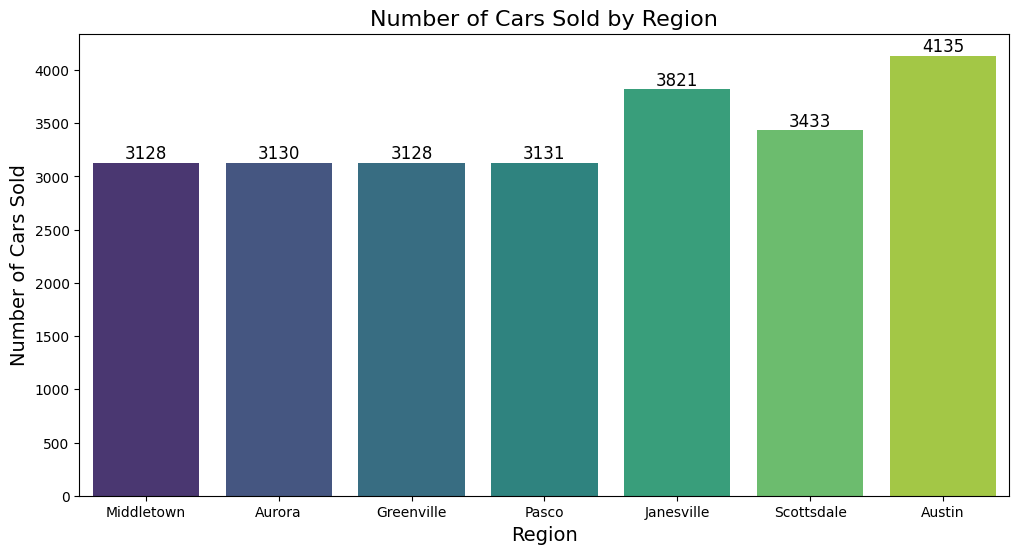

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dealer_Region', y='Price', data=df, palette='coolwarm')
plt.title('Distribution of Car Prices by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.show()

# 2. Number of Cars Sold by Region
plt.figure(figsize=(12, 6))
sns.countplot(x='Dealer_Region', data=df, palette='viridis')
plt.title('Number of Cars Sold by Region', fontsize=16)

# Add count values on top of bars
ax = plt.gca()
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{int(bar.get_height())}',
        ha='center',
        va='bottom',
        fontsize=12
    )

plt.xlabel('Region', fontsize=14)
plt.ylabel('Number of Cars Sold', fontsize=14)
plt.show()

Q8. How does the average car price differ between cars with different engine sizes?

In [ ]:
df.groupby("Engine")["Price"].mean()

,Price
Engine,
DoubleÂ Overhead Camshaft,28248.525972
Overhead Camshaft,27914.710631


Q9. How do car prices vary based on the customer's annual income bracket?

<Axes: xlabel='Annual Income', ylabel='Price'>

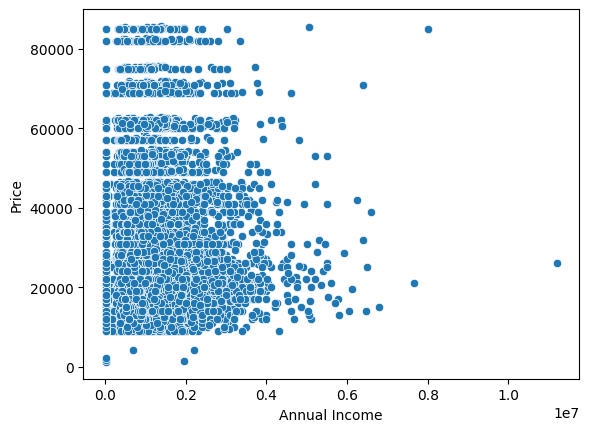

In [ ]:
sns.scatterplot(x = "Annual Income",y = "Price",data = df)


Q10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?

In [ ]:
datas = df.groupby("Model")["Price"].agg(["count","sum"])
datas.rename(columns = {"count":"total_sales","sum":"total_price"},inplace = True)

datas.sort_values(by = "total_sales",ascending = False)[:5]

,total_sales,total_price
Model,,
Diamante,418,9308151
Silhouette,411,12271849
Prizm,411,9386606
Passat,391,7663885
Ram Pickup,383,10655391


Q11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?

In [ ]:
data=df.groupby(["Engine","Color"])["Price"].sum().reset_index()
data

,Engine,Color,Price
0,DoubleÂ Overhead Camshaft,Black,107497634
1,DoubleÂ Overhead Camshaft,Pale White,179083474
2,DoubleÂ Overhead Camshaft,Red,68531112
3,Overhead Camshaft,Black,116935984
4,Overhead Camshaft,Pale White,130275196
5,Overhead Camshaft,Red,69202065


Q12. Is there any seasonal trend in car sales based on the date of sale?

In [ ]:
data = df.groupby("Date")["Price"].sum().sort_values(ascending = False)[:10].reset_index()
data

,Date,Price
0,9/5/2023,5280696
1,11/10/2023,4596334
2,12/29/2023,4430666
3,12/11/2023,4099733
4,11/8/2022,3968329
5,11/24/2023,3890673
6,6/12/2023,3664448
7,5/30/2023,3614248
8,9/2/2023,3538293
9,9/8/2023,3475783


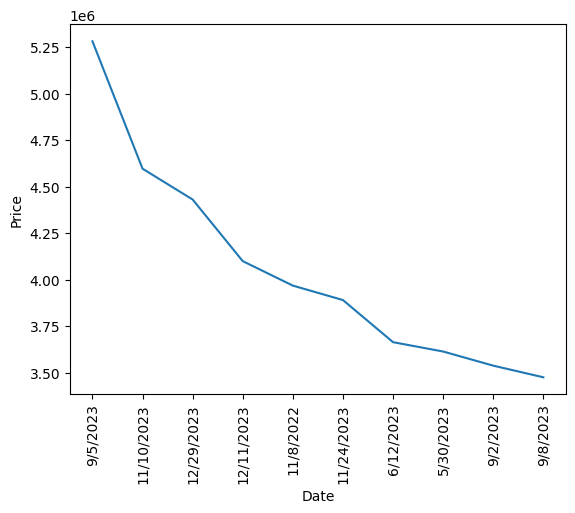

In [ ]:
sns.lineplot(x = data.Date,y = data.Price)
plt.xticks(rotation = 90)
plt.show()

Q13. How does the car price distribution change when considering different combinations of body style and transmission type ?

In [ ]:
df.groupby(["Transmission","Body Style"])["Price"].sum().reset_index()

,Transmission,Body Style,Price
0,Auto,Hardtop,44380425
1,Auto,Hatchback,89598664
2,Auto,Passenger,58409987
3,Auto,SUV,84869334
4,Auto,Sedan,77853810
5,Manual,Hardtop,42227483
6,Manual,Hatchback,76635810
7,Manual,Passenger,55766328
8,Manual,SUV,85747815
9,Manual,Sedan,56035809


<Axes: xlabel='Body Style', ylabel='Price'>

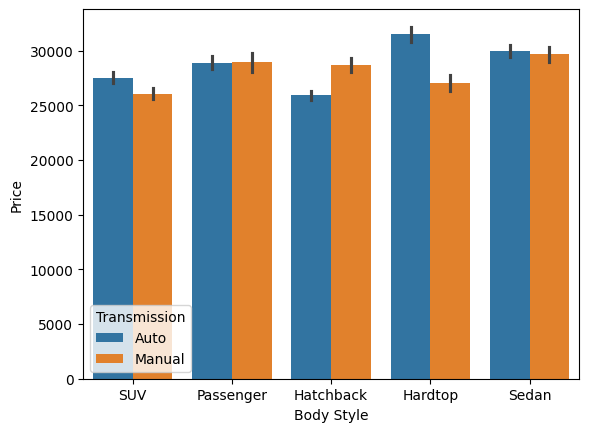

In [ ]:
sns.barplot(x= df["Body Style"],y = df["Price"],hue = df["Transmission"])

Q14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

In [ ]:
df["Engine"].replace({"DoubleÂ\xa0Overhead Camshaft":1,"Overhead Camshaft":0},inplace = True)

<Axes: >

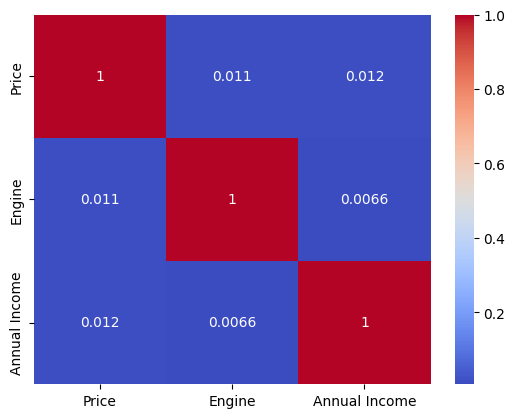

In [ ]:
sns.heatmap(df[["Price","Engine","Annual Income"]].corr(),cmap= "coolwarm",annot = True)

engine and annual Income almost same positivily corelated to Price , engine and annual income not much correlated to each other

Q15. How does the average car price vary across different car models and engine types?

In [ ]:
data = df.groupby(["Engine","Model"])["Price"].mean().reset_index()
data

,Engine,Model,Price
0,0,3000GT,21770.659864
1,0,323i,21038.162162
2,0,328i,38676.177215
3,0,4Runner,25075.416667
4,0,5-Sep,28071.454545
...,...,...,...
256,1,Viper,32118.479167
257,1,Voyager,22066.026316
258,1,Windstar,25145.636364
259,1,Wrangler,21145.294737


<Axes: xlabel='Engine', ylabel='Price'>

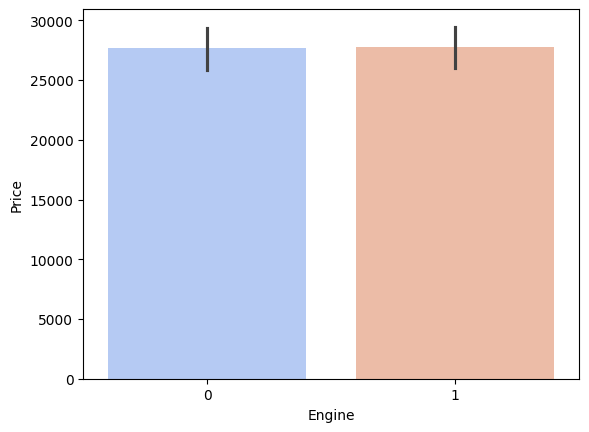

In [ ]:
sns.barplot(x = data.Engine,y = data.Price,palette = "coolwarm")

# EDA 3 Amazon Sales Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("amazon.csv")

In [ ]:
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [ ]:
df.shape

(1465, 16)

In [ ]:
df.dtypes

,0
product_id,object
product_name,object
category,object
discounted_price,object
actual_price,object
discount_percentage,object
rating,object
rating_count,object
about_product,object
user_id,object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [ ]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [ ]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [ ]:
df.isnull().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,2
about_product,0
user_id,0


In [ ]:
df.duplicated().sum()

0

Q1. What is the average rating for each product category?

In [ ]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

In [ ]:
average_ratings = df.groupby('category')['rating'].mean()
average_ratings

,rating
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,4.050000
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",4.250000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",4.150000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",4.300000


Q2. What are the top rating_count products by category?

In [ ]:
top_rating = df.groupby('category')['rating_count'].sum().reset_index()
top_rating = top_rating.sort_values(by = "rating_count", ascending = False)
top_rating

,category,rating_count
77,"Electronics|Headphones,Earbuds&Accessories|Hea...","97,1751,07,15133,58460,02613,79742,77597,17491..."
47,Computers&Accessories|NetworkingDevices|Networ...,"95,116"
68,Electronics|Cameras&Photography|SecurityCamera...,"93,1121,8803,60644,6965,554"
37,Computers&Accessories|Components|InternalSolid...,"92,9253,0292,515"
20,Computers&Accessories|Accessories&Peripherals|...,"9,94011,3309,7012,8681,09222,860"
...,...,...
109,Electronics|Mobiles&Accessories|MobileAccessor...,"1,193"
0,Car&Motorbike|CarAccessories|InteriorAccessori...,"1,118"
153,Home&Kitchen|Kitchen&HomeAppliances|SewingMach...,"1,06713,2512,4492,283"
148,"Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea...","1,065"


Q3. What is the distribution of discounted prices vs. actual prices?

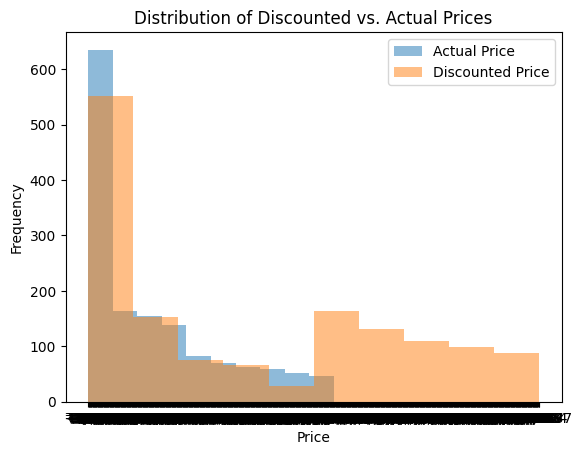

In [ ]:
plt.hist(df['actual_price'], bins=10, alpha=0.5, label='Actual Price')
plt.hist(df['discounted_price'], bins=10, alpha=0.5, label='Discounted Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Discounted vs. Actual Prices')
plt.show()

Q5. What are the most popular product names?

In [ ]:
popular_prd= df['product_name'].value_counts()
popular_prd

,count
product_name,
"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution",5
"Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3"",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating",4
"Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)",3
MI Braided USB Type-C Cable for Charging Adapter (Red),3
"Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)",3
...,...
"SanDisk Ultra microSD UHS-I Card 64GB, 120MB/s R",1
"Noise ColorFit Ultra SE Smart Watch with 1.75""(4.3cm) HD Display, Aluminium Alloy Body, 60 Sports Modes, Spo2, Lightweight, Stock Market Info, Calls & SMS Reply (Vintage Brown)",1
Nokia 150 (2020) (Cyan),1


* Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution is a most popular product .

Q6. What are the most popular product keywords?

In [ ]:
keyword_counts = df['keyword'].value_counts()

KeyError: 'keyword'

In [ ]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

Q7. What are the most popular product reviews?

In [ ]:
popular_reviews = df.groupby('product_name')['review_content'].value_counts().reset_index('product_name')
popular_reviews

product_name  \
review_content                                                                                          
Very good,Good quality product and value for mo...  !!1000 Watt/2000-Watt Room Heater!! Fan Heater...   
Everything is fine about the product, light wei...  !!HANEUL!!1000 Watt/2000-Watt Room Heater!! Fa...   
It's good product and value for money.  it's co...  10WeRun Id-116 Bluetooth Smartwatch Wireless F...   
Absolutely value for money. I connect it with m...  10k 8k 4k HDMI Cable, Certified 48Gbps 1ms Ult...   
It's a good product but the paper sometimes  do...  3M Post-it Sticky Note Cube, 200 Sheets (4 Col...   
...                                                                                               ...   
(Realme Buds Wireless design and  specification...  realme Buds Wireless in Ear Bluetooth Earphone...   
After using the phone for a day, I feel corners...  realme narzo 50 (Speed Blue, 4GB RAM+64GB Stor...   
If your budget is low and you are looking for a...  realme narzo 50i (Mint Green, 2GB RAM+32GB Sto...   
This eliminates the need to buy chargers for th...  rts [2 Pack] Mini USB C Type C Adapter Plug, T...   
This connector has provided as a boon for my ol...  tizum HDMI to VGA Adapter Cable 1080P for Proj...   

                                                    count  
review_content                                             
Very good,Good quality product and value for mo...      1  
Everything is fine about the product, light wei...      1  
It's good product and value for money.  it's co...      1  
Absolutely value for money. I connect it with m...      1  
It's a good product but the paper sometimes  do...      1  
...                                                   ...  
(Realme Buds Wireless design and  specification...      1  
After using the phone for a day, I feel corners...      1  
If your budget is low and you are looking for a...      1  
This eliminates the need to buy chargers for th...      1  
This connector has provided as a boon for my ol...      2  

[1357 rows x 2 columns]

* !!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in India!! is a most popular product reviews

Q8. What is the correlation between discounted_price and rating?

In [ ]:
# Convert 'discounted_price' column to numeric, handling currency symbols and commas
df['discounted_price'] = df['discounted_price'].astype(str).str.replace('₹', '', regex=False).str.replace(',', '', regex=False)
# Split the 'discounted_price' column by '|' and take the first value
df['discounted_price'] = df['discounted_price'].str.split('|').str[0]
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')

# Convert 'rating' column to numeric, handling non-numeric values
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Now, calculate the correlation
correlation = df['discounted_price'].corr(df['rating'])
print(correlation)

0.12033741712288548


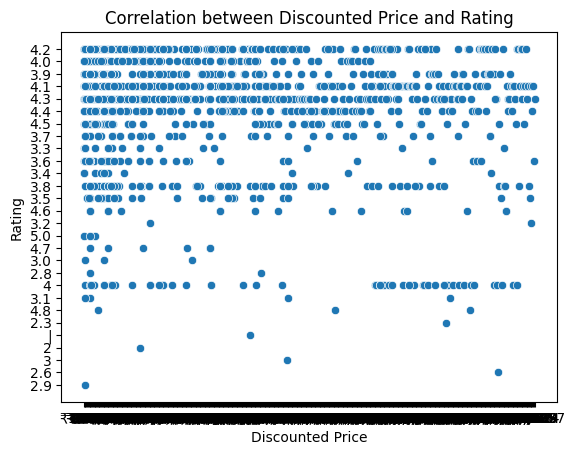

In [ ]:
sns.scatterplot(x='discounted_price', y='rating', data=df)
plt.xlabel('Discounted Price')
plt.ylabel('Rating')
plt.title('Correlation between Discounted Price and Rating')
plt.show()

Q9. What are the Top 5 categories based on the highest ratings?

In [ ]:
avg_ratings = df.groupby('category')['rating'].mean()

top_categories = avg_ratings.nlargest(5)
top_categories

,rating
category,
Computers&Accessories|Tablets,4.6
Computers&Accessories|Components|Memory,4.5
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters,4.5
Electronics|Cameras&Photography|Accessories|Film,4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients,4.5


Q10. Identify any potential areas for improvement or optimization based on the data analysis.

Based on the provided code and sample data, here are some potential areas for improvement or optimization:

1. Data Cleaning and Preprocessing:

* Handle Missing Values: If your actual data contains missing values (e.g., missing ratings, prices), you'll need to handle them appropriately. Common approaches include:
  * Imputation: Filling missing values with estimated values (e.g., mean, median, or more sophisticated methods).
  * Removal: Removing rows or columns with missing values (if the amount is small and doesn't significantly impact the analysis).
* Text Cleaning (for reviews): If analyzing text data (like product reviews), preprocess the text by:
  * Lowercasing: Converting all text to lowercase.
  * Removing punctuation: Removing unnecessary characters like commas, periods, and exclamation marks.
  * Removing stop words: Removing common words like "the," "a," "is," "are," which often don't carry significant meaning.
  * Stemming/Lemmatization: Reducing words to their base form (e.g., "running" -> "run").
2. Data Analysis:

* Correlation Analysis:
  * Consider other factors: Explore the correlation between discounted_price and rating with other relevant variables (e.g., product_category, brand, customer_segment).
  * Causation: Remember that correlation does not imply causation. Further analysis might be needed to understand the underlying factors driving the relationship between price and rating.
* Product Reviews:
  * Sentiment Analysis: Perform sentiment analysis on the reviews to understand the overall sentiment (positive, negative, neutral) towards each product.
  * Topic Modeling: Identify common themes and topics discussed in the reviews using techniques like Latent Dirichlet Allocation (LDA).
* Category Analysis:
  * Explore within-category variations: Analyze the distribution of ratings and other metrics within each category to identify sub-categories or specific product types that perform better.
  * Competitive Analysis: Compare the performance of your products within each category to competitors.
3. Visualization:

* Improve Plot Aesthetics: Customize plots with titles, labels, legends, and different color schemes for better readability and visual appeal.
* Interactive Plots: Consider using interactive visualization libraries (like Plotly or Bokeh) to create interactive plots that allow users to explore the data more dynamically.
4. Code Optimization:

* Vectorization: Utilize vectorized operations provided by libraries like NumPy and pandas to improve the efficiency of your code, especially for large datasets.
* Profiling: Use profiling tools to identify performance bottlenecks in your code and optimize those sections.
5. Advanced Techniques:

* Machine Learning: Explore machine learning techniques for tasks such as:
  * Predicting product ratings: Build models to predict product ratings based on various factors (e.g., price, features, reviews).
  * Customer segmentation: Group customers based on their purchasing behavior and preferences.
  * Recommendation systems: Recommend products to customers based on their past purchases and preferences.

# EDA 4 Spotify

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("spotify.csv")

In [ ]:
df.shape

(440, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


In [ ]:
df.dtypes

,0
Artist,object
Track Name,object
Popularity,int64
Duration (ms),int64
Track ID,object


In [ ]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [3]:
df.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [ ]:
df.isnull().sum()

,0
Artist,0
Track Name,0
Popularity,0
Duration (ms),0
Track ID,0


In [ ]:
df.duplicated().sum()

27

Q1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
the needful.

In [ ]:
for i in df.columns:
    print(f"{i}, duplicated : {df[i].duplicated().sum()}")
    print()
    print(f"{i}, null : {df[i].isnull().sum()}")
    print()

Artist, duplicated : 325

Artist, null : 0

Track Name, duplicated : 28

Track Name, null : 0

Popularity, duplicated : 389

Popularity, null : 0

Duration (ms), duplicated : 30

Duration (ms), null : 0

Track ID, duplicated : 27

Track ID, null : 0



Q2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

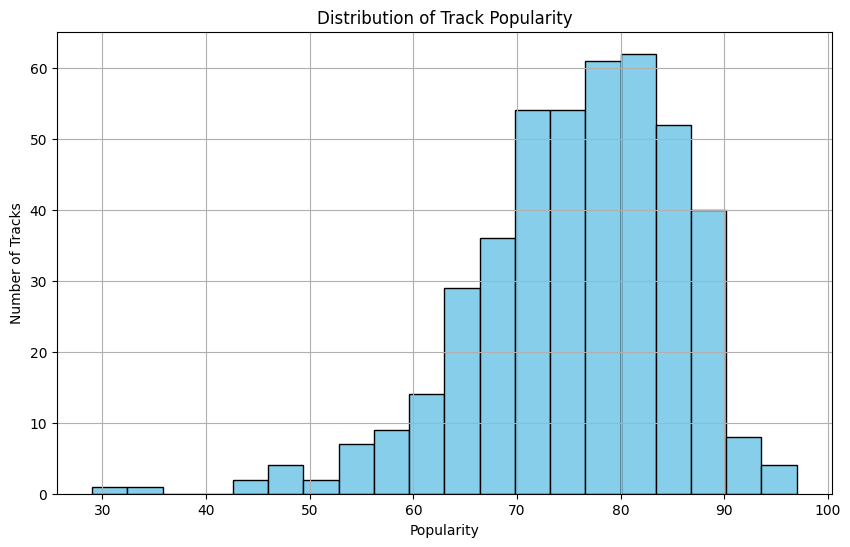

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['Popularity'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Popularity')
plt.ylabel('Number of Tracks')
plt.title('Distribution of Track Popularity')
plt.grid(True)
plt.show()

Q3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

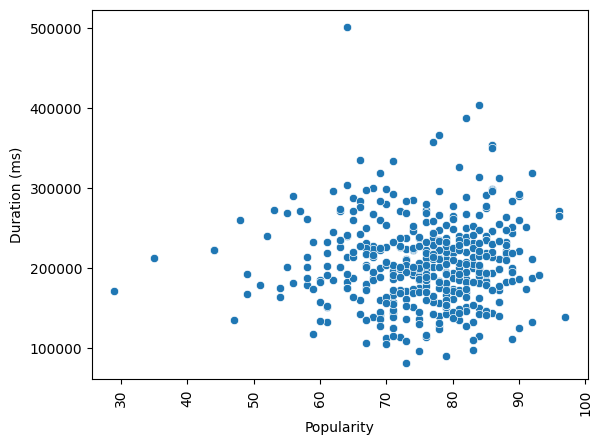

In [ ]:
sns.scatterplot(x = df["Popularity"], y = df["Duration (ms)"])
plt.xticks(rotation = 90)
plt.show()

Q4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.

In [ ]:
data = df["Artist"].value_counts().reset_index()
data

,Artist,count
0,Drake,20
1,Travis Scott,12
2,21 Savage,11
3,¥$,11
4,Lil Nas X,11
...,...,...
110,Arizona Zervas,1
111,Fivio Foreign,1
112,Pressa,1
113,David Guetta,1


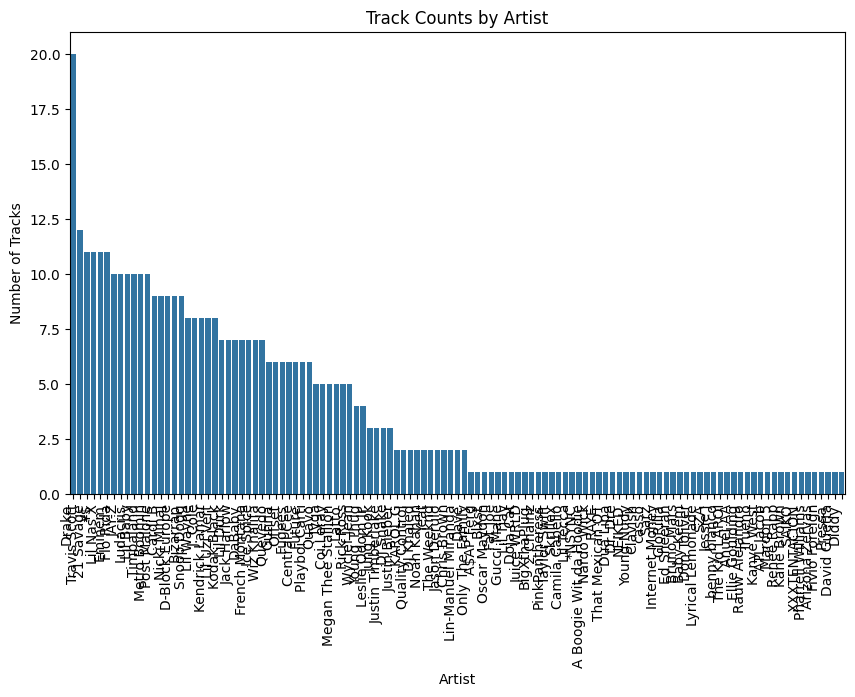

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Artist', data=df, order=df['Artist'].value_counts().index)
plt.xlabel('Artist')
plt.ylabel('Number of Tracks')
plt.title('Track Counts by Artist')
plt.xticks(rotation=90, ha='right')
plt.show()

Q5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

In [13]:
df.groupby(["Artist","Track Name"])["Popularity"].count().sort_values(ascending = True).reset_index()[:5]

,Artist,Track Name,Popularity
0,*NSYNC,Better Place (Reunion),1
1,Lyrical Lemonade,Stop Giving Me Advice (with Jack Harlow & Dave),1
2,Ludacris,What's Your Fantasy (Featuring Shawna),1
3,Ludacris,Stand Up,1
4,Ludacris,Rollout (My Business),1


Q6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.

In [16]:
df.groupby("Artist").agg({"Popularity": "mean"}).sort_values(by="Popularity", ascending=False)[:5]

,Popularity
Artist,
cassö,92.000000
Trueno,89.000000
David Guetta,87.000000
Travis Scott,87.000000
¥$,86.090909


Q7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

In [18]:
top_5_artists = (df.groupby("Artist")["Popularity"].sum().sort_values(ascending=False).head(5).index)
filtered_df = df[df["Artist"].isin(top_5_artists)]

most_popular_tracks = (filtered_df.loc[filtered_df.groupby("Artist")["Popularity"].idxmax(), ["Artist", "Track Name"]])
most_popular_tracks

,Artist,Track Name
70,21 Savage,redrum
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA)
80,Eminem,Without Me
30,Travis Scott,FE!N (feat. Playboi Carti)
260,¥$,CARNIVAL


Q8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.

In [21]:
nume = df.select_dtypes(include = "int")
nume

,Popularity,Duration (ms)
0,92,319191
1,91,173986
2,90,260111
3,88,247444
4,88,218364
...,...,...
435,44,221863
436,64,191900
437,69,283693
438,65,220408


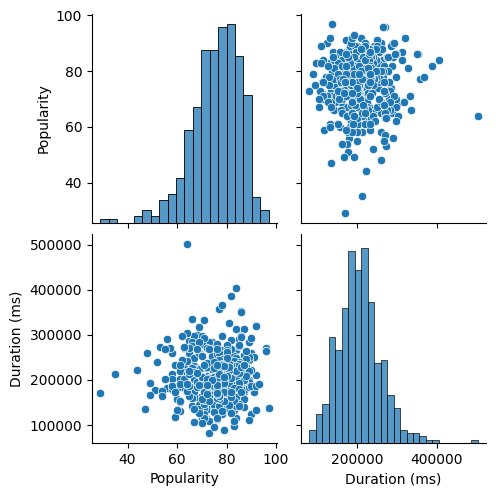

In [22]:
sns.pairplot(nume)
plt.show()

Q9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.

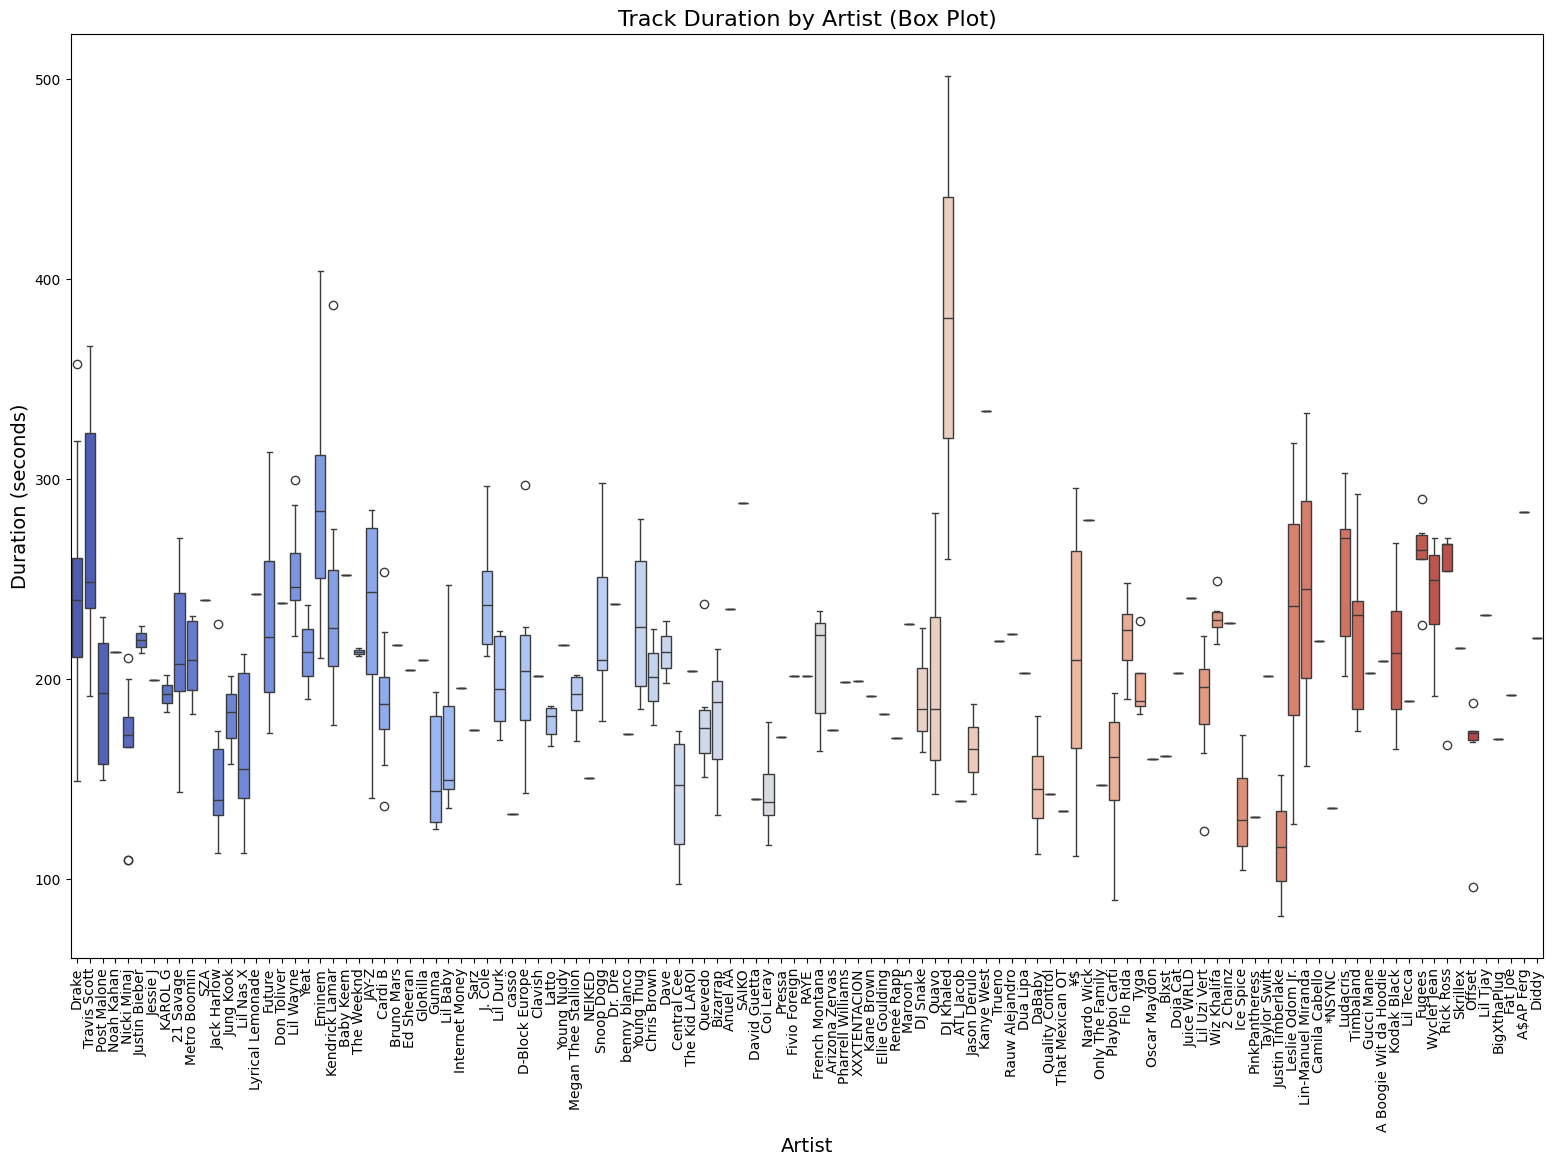

In [23]:
df['Duration (seconds)'] = df['Duration (ms)'] / 1000

plt.figure(figsize=(19, 12))
sns.boxplot(x='Artist', y='Duration (seconds)', data=df, palette='coolwarm')
plt.title('Track Duration by Artist (Box Plot)', fontsize=16)
plt.xlabel('Artist', fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('Duration (seconds)', fontsize=14)
plt.show()

Q10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

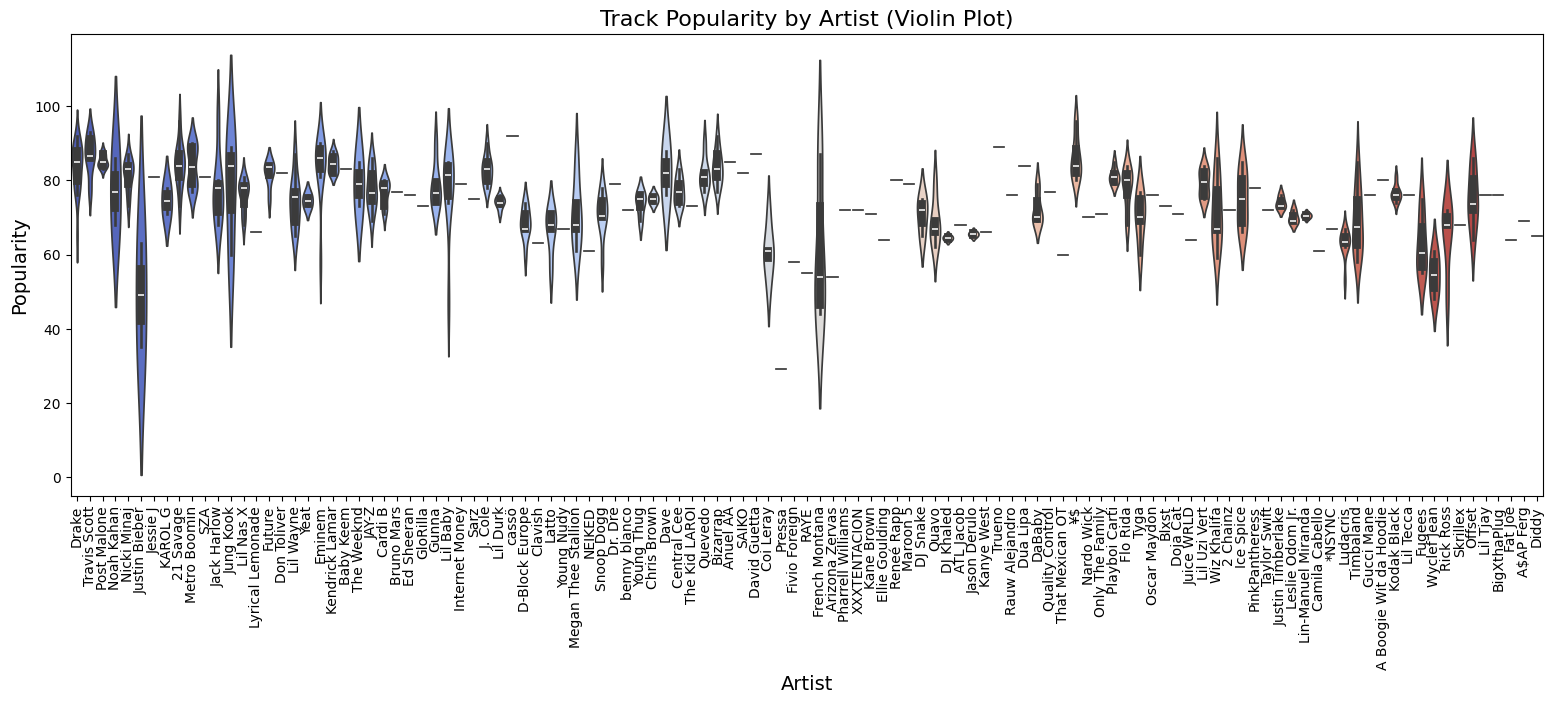

In [24]:
plt.figure(figsize=(19, 6))
sns.violinplot(x='Artist', y='Popularity', data=df, palette='coolwarm', scale='width')
plt.title('Track Popularity by Artist (Violin Plot)', fontsize=16)
plt.xlabel('Artist', fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('Popularity', fontsize=14)
plt.show()